# Bloc 6 : Patient Survival Prediction

Les prédicteurs de la mortalité hospitalière des patients admis restent mal caractérisés. Notre objectif est de développer et de valider un modèle de prédiction de la mortalité hospitalière toutes causes confondues chez les patients admis. Et ensuite de créer une application web de prédiction du risque de la mortalité destinée en premier lieu aux personnels soignants afin de faciliter une meilleure prise en charge du patient admis.

# 1) Presentation dataset

In [1]:
import pandas as pd

data = pd.read_csv("dataset.csv")
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [2]:
data.shape


(91713, 85)

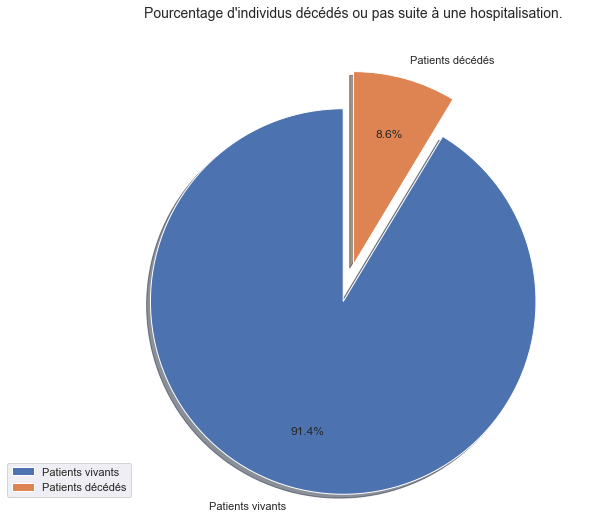

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

target = data.hospital_death.value_counts(normalize=True)
sns.set()

plt.figure(figsize = (19, 19))

plt.subplot(1,2,1)



labels= ["Patients vivants","Patients décédés"]

valeur = target
explode = (0.2,0.0)


plt.pie(valeur, labels=labels, autopct='%1.1f%%',startangle=90, shadow = True, explode = explode, pctdistance = 0.7, labeldistance = 1.1,)

plt.legend(labels,bbox_to_anchor=(0.05, 0.1))

plt.title("Pourcentage d'individus décédés ou pas suite à une hospitalisation.", size =14);

## 1-a) Nombre de valeurs manquantes

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


dico_isnull = {c : len(data[data[c].isnull()== True]) for c in data.columns}
dico_isnull

{'encounter_id': 0,
 'patient_id': 0,
 'hospital_id': 0,
 'age': 4228,
 'bmi': 3429,
 'elective_surgery': 0,
 'ethnicity': 1395,
 'gender': 25,
 'height': 1334,
 'icu_admit_source': 112,
 'icu_id': 0,
 'icu_stay_type': 0,
 'icu_type': 0,
 'pre_icu_los_days': 0,
 'weight': 2720,
 'apache_2_diagnosis': 1662,
 'apache_3j_diagnosis': 1101,
 'apache_post_operative': 0,
 'arf_apache': 715,
 'gcs_eyes_apache': 1901,
 'gcs_motor_apache': 1901,
 'gcs_unable_apache': 1037,
 'gcs_verbal_apache': 1901,
 'heart_rate_apache': 878,
 'intubated_apache': 715,
 'map_apache': 994,
 'resprate_apache': 1234,
 'temp_apache': 4108,
 'ventilated_apache': 715,
 'd1_diasbp_max': 165,
 'd1_diasbp_min': 165,
 'd1_diasbp_noninvasive_max': 1040,
 'd1_diasbp_noninvasive_min': 1040,
 'd1_heartrate_max': 145,
 'd1_heartrate_min': 145,
 'd1_mbp_max': 220,
 'd1_mbp_min': 220,
 'd1_mbp_noninvasive_max': 1479,
 'd1_mbp_noninvasive_min': 1479,
 'd1_resprate_max': 385,
 'd1_resprate_min': 385,
 'd1_spo2_max': 333,
 'd1_spo2

In [5]:
dico_isnull_p = {c : round((len(data[data[c].isnull()== True])/(data.shape[0])*100),2) for c in data.columns}
dico_isnull_p

{'encounter_id': 0.0,
 'patient_id': 0.0,
 'hospital_id': 0.0,
 'age': 4.61,
 'bmi': 3.74,
 'elective_surgery': 0.0,
 'ethnicity': 1.52,
 'gender': 0.03,
 'height': 1.45,
 'icu_admit_source': 0.12,
 'icu_id': 0.0,
 'icu_stay_type': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 2.97,
 'apache_2_diagnosis': 1.81,
 'apache_3j_diagnosis': 1.2,
 'apache_post_operative': 0.0,
 'arf_apache': 0.78,
 'gcs_eyes_apache': 2.07,
 'gcs_motor_apache': 2.07,
 'gcs_unable_apache': 1.13,
 'gcs_verbal_apache': 2.07,
 'heart_rate_apache': 0.96,
 'intubated_apache': 0.78,
 'map_apache': 1.08,
 'resprate_apache': 1.35,
 'temp_apache': 4.48,
 'ventilated_apache': 0.78,
 'd1_diasbp_max': 0.18,
 'd1_diasbp_min': 0.18,
 'd1_diasbp_noninvasive_max': 1.13,
 'd1_diasbp_noninvasive_min': 1.13,
 'd1_heartrate_max': 0.16,
 'd1_heartrate_min': 0.16,
 'd1_mbp_max': 0.24,
 'd1_mbp_min': 0.24,
 'd1_mbp_noninvasive_max': 1.61,
 'd1_mbp_noninvasive_min': 1.61,
 'd1_resprate_max': 0.42,
 'd1_resprate_min': 0.4

In [6]:
data.drop('Unnamed: 83', axis = 1, inplace=True)
data.shape

(91713, 84)

## 1-b) Sélection features 

### Séparation des variables numériques et  des catégorielles

In [7]:
df = data.copy()
df=df.dropna()

In [8]:
df.shape

(56935, 84)

In [9]:
df_int= df.select_dtypes(include='int64') 
df_int.drop("patient_id", axis = 1, inplace=True)
df_int.drop("encounter_id", axis = 1, inplace=True)
df_int.drop("hospital_death", axis = 1, inplace=True)
df_int

C:\Users\vanes\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,hospital_id,elective_surgery,icu_id,apache_post_operative
0,118,0,92,0
1,81,0,90,0
5,83,0,95,0
10,77,1,113,1
17,118,0,92,0
...,...,...,...,...
91698,195,1,908,1
91706,121,0,925,0
91708,30,0,927,0
91709,121,0,925,0


In [10]:
df_string= df.select_dtypes(include='object')
df_string

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
5,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic
10,Hispanic,F,Operating Room / Recovery,admit,Med-Surg ICU,Respiratory,Respiratory
17,Hispanic,M,Accident & Emergency,admit,CTICU,Respiratory,Respiratory
...,...,...,...,...,...,...,...
91698,Caucasian,M,Operating Room / Recovery,admit,Med-Surg ICU,Gastrointestinal,Gastrointestinal
91706,Native American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular


In [11]:
df_numerique= df.select_dtypes(include='float64')
df_numerique.columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp

In [12]:
list_categories = ['apache_3j_diagnosis','gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache','aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']

df_numerique.drop(list_categories , axis=1,inplace=True)

C:\Users\vanes\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df_categorial = pd.concat([df_int,df_string,data[list_categories]], axis=1)
df_categorial

,hospital_id,elective_surgery,icu_id,apache_post_operative,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,118.0,0.0,92.0,0.0,Caucasian,M,Floor,admit,CTICU,Sepsis,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,81.0,0.0,90.0,0.0,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,30.0,0.0,927.0,0.0,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,121.0,0.0,925.0,0.0,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_numerique

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,arf_apache,heart_rate_apache,map_apache,resprate_apache,...,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,180.3,0.541667,73.9,113.0,0.0,118.0,40.0,36.0,...,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05
1,77.0,27.420000,160.0,0.927778,70.2,108.0,0.0,120.0,46.0,33.0,...,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29
5,67.0,27.560000,190.5,0.000694,100.0,301.0,0.0,113.0,130.0,35.0,...,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02
10,72.0,28.257052,154.9,0.004861,67.8,303.0,0.0,101.0,72.0,15.0,...,145.0,114.0,145.0,114.0,158.0,133.0,4.2,4.2,0.01,0.00
17,46.0,25.845717,167.6,0.000000,72.6,108.0,0.0,114.0,113.0,34.0,...,169.0,115.0,169.0,115.0,143.0,143.0,4.9,4.9,0.11,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,47.0,51.439842,195.0,0.033333,186.0,304.0,0.0,137.0,66.0,8.0,...,104.0,104.0,104.0,104.0,128.0,128.0,4.2,4.2,0.01,0.00
91706,54.0,19.770448,177.8,0.025694,62.5,109.0,0.0,55.0,62.0,12.0,...,169.0,143.0,169.0,143.0,91.0,91.0,4.2,4.1,0.01,0.00
91708,75.0,23.060250,177.8,0.298611,72.9,113.0,0.0,115.0,48.0,9.0,...,94.0,87.0,94.0,87.0,400.0,187.0,4.2,4.2,0.12,0.05
91709,56.0,47.179671,183.0,0.120139,158.0,113.0,0.0,100.0,62.0,33.0,...,127.0,107.0,127.0,107.0,177.0,177.0,3.8,3.8,0.03,0.02


### Test statistique sur les variables numériques (par test ANOVA)

In [15]:
X_numerique = df_numerique
y_numerique = df.loc[:,"hospital_death"]


In [16]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k="all")
# apply feature selection
X_selected = fs.fit_transform(X_numerique, y_numerique)
print(X_selected.shape)

(56935, 55)


In [17]:
features_names = X_numerique.columns
features_names[fs.get_support()]

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'arf_apache', 'heart_rate_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_s

In [18]:
# Feature importance 
feature_importance_numerique = pd.DataFrame({
    "feature_names": features_names,
    "coefficients":fs.scores_
})

feature_importance_numerique.sort_values(by = "coefficients", ascending = False)

,feature_names,coefficients
53,apache_4a_hospital_death_prob,8544.457003
54,apache_4a_icu_death_prob,7557.397338
30,d1_temp_min,2499.486119
24,d1_spo2_min,2483.797497
26,d1_sysbp_min,2446.865417
28,d1_sysbp_noninvasive_min,2441.020133
18,d1_mbp_min,2155.065846
20,d1_mbp_noninvasive_min,2145.726652
12,d1_diasbp_min,1808.547200
14,d1_diasbp_noninvasive_min,1803.547100


Méthodologie de sélection: on a enlevé toutes les colonnes ayant un coefficient inférieur à 20.

On a aussi enlever une des variables de même nature ou de même contexte qui ont des coefficients qui sont très proches, et on a garder celui qui a le coefficient le plus élevé. 

Par exemple "d1_sysbp_min" coef = 2446 et "d1_sysbp_noninvasive_min"  coef = 2441  sont deux variables qui représentent la tension artérielle, on a garder "d1_sysbp_min" coef = 2446.


In [19]:
# suppresion des variables numériques par sélection ANOVA
data.drop("bmi", axis = 1, inplace=True)
data.drop("height", axis = 1, inplace=True)



data.drop("d1_diasbp_max", axis = 1, inplace=True)



data.drop("d1_diasbp_noninvasive_max", axis = 1, inplace=True)

data.drop("d1_diasbp_noninvasive_min", axis = 1, inplace=True)

data.drop("d1_sysbp_noninvasive_max", axis = 1, inplace=True)
data.drop("d1_sysbp_noninvasive_min", axis = 1, inplace=True)

data.drop("d1_sysbp_max", axis = 1, inplace=True)


data.drop("d1_spo2_max", axis = 1, inplace=True)


data.drop("h1_diasbp_max", axis = 1, inplace=True)

data.drop("h1_diasbp_min", axis = 1, inplace=True)




data.drop("h1_sysbp_noninvasive_max", axis = 1, inplace=True)
data.drop("h1_sysbp_noninvasive_min", axis = 1, inplace=True)


data.drop("h1_mbp_max", axis = 1, inplace=True)

data.drop("h1_mbp_min", axis = 1, inplace=True)
data.drop("d1_heartrate_min",axis = 1, inplace=True)


data.drop("d1_mbp_max", axis = 1, inplace=True)
data.drop("d1_mbp_noninvasive_min", axis = 1, inplace=True)
data.drop("d1_mbp_noninvasive_max", axis = 1, inplace=True)








In [20]:
# les variables catégorielles supprimées car elles possèdent plusieurs classes qui ont une ou deux individus pas représentatifs.
data.drop("hospital_id", axis = 1, inplace=True)

data.drop("icu_id", axis = 1, inplace=True)

data.drop("icu_stay_type", axis = 1, inplace=True)

data.drop("apache_3j_diagnosis", axis = 1, inplace=True)

data.drop('encounter_id', axis = 1, inplace=True)

data.drop('patient_id', axis = 1, inplace=True)
data.drop("gcs_unable_apache", axis = 1, inplace=True)



In [21]:
data.columns

Index(['age', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_noninvasive_max',
       'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', '

In [22]:
data.shape

(91713, 58)

### 1-c) Suppresion  des valeurs manquantes, valeurs aberrantes et des doublons 

#### Suppression des valeurs manquantes

In [23]:
dico_isnull_p = {c : np.around((len(data[data[c].isnull()== True]))/(data.shape[0])*100) for c in data.columns}
dico_isnull_p

{'age': 5.0,
 'elective_surgery': 0.0,
 'ethnicity': 2.0,
 'gender': 0.0,
 'icu_admit_source': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 3.0,
 'apache_2_diagnosis': 2.0,
 'apache_post_operative': 0.0,
 'arf_apache': 1.0,
 'gcs_eyes_apache': 2.0,
 'gcs_motor_apache': 2.0,
 'gcs_verbal_apache': 2.0,
 'heart_rate_apache': 1.0,
 'intubated_apache': 1.0,
 'map_apache': 1.0,
 'resprate_apache': 1.0,
 'temp_apache': 4.0,
 'ventilated_apache': 1.0,
 'd1_diasbp_min': 0.0,
 'd1_heartrate_max': 0.0,
 'd1_mbp_min': 0.0,
 'd1_resprate_max': 0.0,
 'd1_resprate_min': 0.0,
 'd1_spo2_min': 0.0,
 'd1_sysbp_min': 0.0,
 'd1_temp_max': 3.0,
 'd1_temp_min': 3.0,
 'h1_diasbp_noninvasive_max': 8.0,
 'h1_diasbp_noninvasive_min': 8.0,
 'h1_heartrate_max': 3.0,
 'h1_heartrate_min': 3.0,
 'h1_mbp_noninvasive_max': 10.0,
 'h1_mbp_noninvasive_min': 10.0,
 'h1_resprate_max': 5.0,
 'h1_resprate_min': 5.0,
 'h1_spo2_max': 5.0,
 'h1_spo2_min': 5.0,
 'h1_sysbp_max': 4.0,
 'h1_sysbp_min': 4.0,
 'd1_gluc

In [24]:
data = data.dropna()

In [25]:
dico_isnull_p = {c : np.around((len(data[data[c].isnull()== True]))/(data.shape[0])*100) for c in data.columns}
dico_isnull_p

{'age': 0.0,
 'elective_surgery': 0.0,
 'ethnicity': 0.0,
 'gender': 0.0,
 'icu_admit_source': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 0.0,
 'apache_2_diagnosis': 0.0,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'gcs_eyes_apache': 0.0,
 'gcs_motor_apache': 0.0,
 'gcs_verbal_apache': 0.0,
 'heart_rate_apache': 0.0,
 'intubated_apache': 0.0,
 'map_apache': 0.0,
 'resprate_apache': 0.0,
 'temp_apache': 0.0,
 'ventilated_apache': 0.0,
 'd1_diasbp_min': 0.0,
 'd1_heartrate_max': 0.0,
 'd1_mbp_min': 0.0,
 'd1_resprate_max': 0.0,
 'd1_resprate_min': 0.0,
 'd1_spo2_min': 0.0,
 'd1_sysbp_min': 0.0,
 'd1_temp_max': 0.0,
 'd1_temp_min': 0.0,
 'h1_diasbp_noninvasive_max': 0.0,
 'h1_diasbp_noninvasive_min': 0.0,
 'h1_heartrate_max': 0.0,
 'h1_heartrate_min': 0.0,
 'h1_mbp_noninvasive_max': 0.0,
 'h1_mbp_noninvasive_min': 0.0,
 'h1_resprate_max': 0.0,
 'h1_resprate_min': 0.0,
 'h1_spo2_max': 0.0,
 'h1_spo2_min': 0.0,
 'h1_sysbp_max': 0.0,
 'h1_sysbp_min': 0.0,
 'd1_glucos

#### Suppression des valeurs aberrantes

In [26]:
des = data.describe()
des

,age,elective_surgery,pre_icu_los_days,weight,apache_2_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,...,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000
mean,62.565679,0.159584,0.823263,84.451029,181.934251,0.182158,0.029551,3.426662,5.443532,3.933187,...,0.062564,0.001012,0.017532,0.235032,0.014880,0.029255,0.007868,0.004222,0.022242,0.086194
std,16.649834,0.366223,2.420957,25.134244,85.626657,0.385978,0.169347,0.973621,1.309109,1.589472,...,0.184339,0.031793,0.131243,0.424023,0.121075,0.168521,0.088350,0.064837,0.147471,0.280653
min,16.000000,0.000000,-0.244444,38.600000,101.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,0.000000,0.036111,67.100000,113.000000,0.000000,0.000000,3.000000,6.000000,3.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,0.000000,0.138889,80.800000,122.000000,0.000000,0.000000,4.000000,6.000000,5.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,0.000000,0.388889,97.500000,301.000000,0.000000,0.000000,4.000000,6.000000,5.000000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,1.000000,73.022917,186.000000,308.000000,1.000000,1.000000,4.000000,6.000000,5.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
des.iloc[:,40:60]

,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000,57324.000000
mean,3.933917,0.107210,0.062564,0.001012,0.017532,0.235032,0.014880,0.029255,0.007868,0.004222,0.022242,0.086194
std,0.582351,0.214898,0.184339,0.031793,0.131243,0.424023,0.121075,0.168521,0.088350,0.064837,0.147471,0.280653
min,2.400000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.900000,0.060000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,0.140000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.800000,0.980000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data = data[data.pre_icu_los_days>=0]                                                                                                                                                  
data = data[data.apache_4a_hospital_death_prob>=0]                                               
data = data[data.apache_4a_icu_death_prob>=0]

In [29]:
data.shape

(56276, 58)

#### Traitement des doublons

In [30]:
data.apache_2_bodysystem.value_counts()

Cardiovascular         23806
Respiratory             7500
Neurologic              7450
Gastrointestinal        5918
Metabolic               5117
Trauma                  2408
Undefined diagnoses     1919
Renal/Genitourinary     1531
Haematologic             428
Undefined Diagnoses      199
Name: apache_2_bodysystem, dtype: int64

In [31]:
def diagnostique(x):
    if x == "Undefined Diagnoses" or x == "Undefined diagnoses" : 
        x = "Undefined diagnoses" 
    return x

data['apache_2_bodysystem'] = data['apache_2_bodysystem'].apply(lambda x: diagnostique(x))

In [32]:
data.apache_2_bodysystem.value_counts()

Cardiovascular         23806
Respiratory             7500
Neurologic              7450
Gastrointestinal        5918
Metabolic               5117
Trauma                  2408
Undefined diagnoses     2118
Renal/Genitourinary     1531
Haematologic             428
Name: apache_2_bodysystem, dtype: int64

In [33]:
data.shape

(56276, 58)

# 2-EDA (data nettoyée)

In [34]:
target = data.hospital_death.value_counts(normalize=True)
target

0    0.913906
1    0.086094
Name: hospital_death, dtype: float64

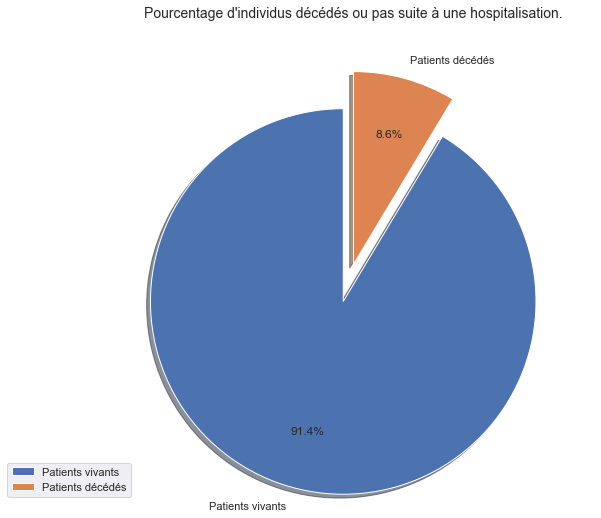

In [35]:
target = data.hospital_death.value_counts(normalize=True)
sns.set()

plt.figure(figsize = (19, 19))

plt.subplot(1,2,1)



labels= ["Patients vivants","Patients décédés"]

valeur = target
explode = (0.2,0.0)


plt.pie(valeur, labels=labels, autopct='%1.1f%%',startangle=90, shadow = True, explode = explode, pctdistance = 0.7, labeldistance = 1.1,)

plt.legend(labels,bbox_to_anchor=(0.05, 0.1))

plt.title("Pourcentage d'individus décédés ou pas suite à une hospitalisation.", size =14);

## 2-b Etude des différents facteurs à risques 

### Test du niveau de conscience du patient

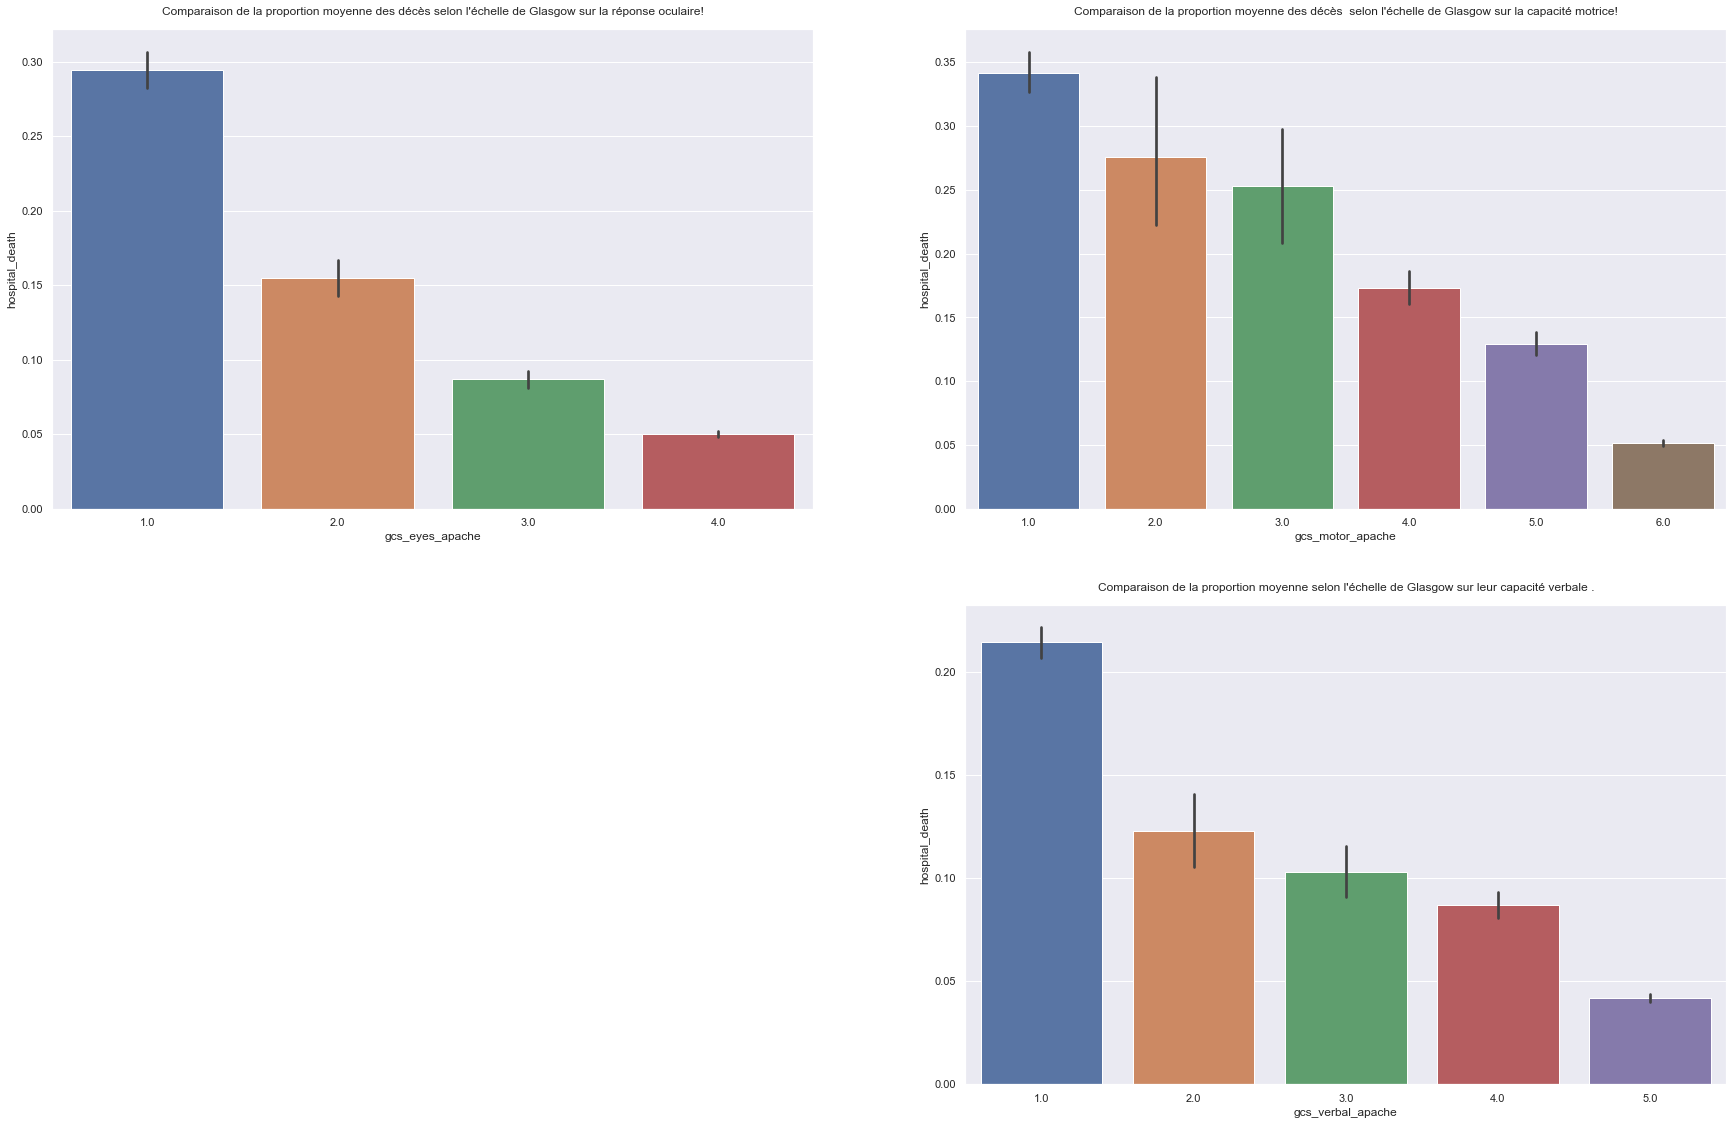

In [36]:
plt.figure(figsize = (30, 30)) 

plt.subplot(3,2,1)

plt.title("Comparaison de la proportion moyenne des décès selon l'échelle de Glasgow sur la réponse oculaire!", pad = 14)

sns.barplot(data = data, x = "gcs_eyes_apache", y = "hospital_death")

plt.subplot(3,2,2)

plt.title("Comparaison de la proportion moyenne des décès  selon l'échelle de Glasgow sur la capacité motrice!", pad = 14)

sns.barplot(data = data, x = "gcs_motor_apache", y = "hospital_death")


plt.subplot(3,2,4)

plt.title("Comparaison de la proportion moyenne selon l'échelle de Glasgow sur leur capacité verbale .", pad = 14)


sns.barplot(data = data, x= "gcs_verbal_apache", y = "hospital_death");

Conclusion: Plus  l'échelle de Glasgow est basse et plus la proportion des décès des patients en milieu hospitalier augmente car les patients sont beaucoup moins réactifs.

### Etude de la fréquence cardiaque

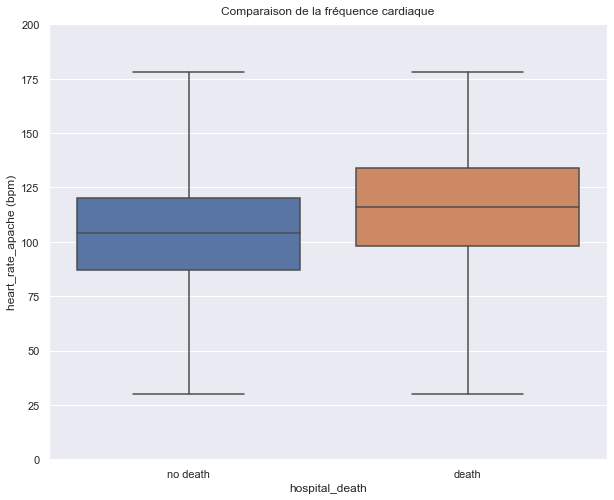

In [37]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparaison de la fréquence cardiaque", pad = 10)

c =sns.boxplot(data = data, y = "heart_rate_apache", x = "hospital_death",whis=5);
c.set_xticklabels(["no death", "death"])
c.set_ylabel("heart_rate_apache (bpm)")
c.set_ylim(0,200);


Conclusion: On observe chez les patients décédés, que 50 % d'entre eux ont une fréquence cardiaque plus élevées soit supérieur ou égale à 123 battements par minute (bpm) par rapport aux patients qui ont survécu.

### Etude de la pression artérielle

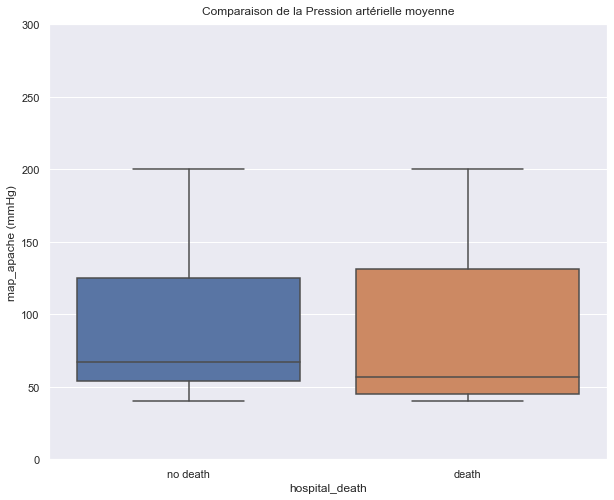

In [38]:
plt.figure(figsize = (10, 8)) 

plt.title("Comparaison de la Pression artérielle moyenne", pad = 10)

p = sns.boxplot(data = data, y = "map_apache", x = "hospital_death",whis=5);
p.set_xticklabels(["no death", "death"])
p.set_ylabel("map_apache (mmHg)")
p.set_ylim(0,300);

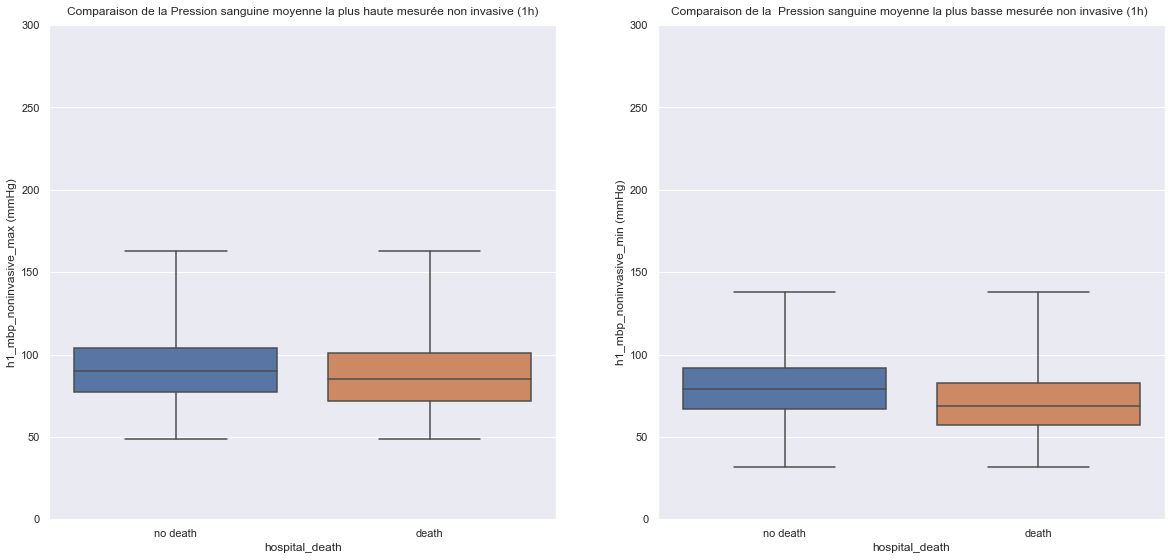

In [39]:
plt.figure(figsize = (20, 20)) 


plt.subplot(2,2,1)

plt.title("Comparaison de la Pression sanguine moyenne la plus haute mesurée non invasive (1h)", pad = 10)

h1_mbp_noninvasive_max = sns.boxplot(data = data, y = "h1_mbp_noninvasive_max", x = "hospital_death",whis=5)
h1_mbp_noninvasive_max.set_xticklabels(["no death", "death"])
h1_mbp_noninvasive_max.set_ylabel("h1_mbp_noninvasive_max (mmHg)")
h1_mbp_noninvasive_max.set_ylim(0,300);

plt.subplot(2,2,2)

plt.title("Comparaison de la  Pression sanguine moyenne la plus basse mesurée non invasive (1h) ", pad = 10)

h1_mbp_noninvasive_min = sns.boxplot(data = data, y = "h1_mbp_noninvasive_min", x = "hospital_death",whis=5);
h1_mbp_noninvasive_min.set_xticklabels(["no death", "death"])
h1_mbp_noninvasive_min.set_ylabel("h1_mbp_noninvasive_min (mmHg)")
h1_mbp_noninvasive_min.set_ylim(0,300);


Conclusion : Pression sanguine moyenne la plus haute (à gauche) et la plus basse (à droite) mesurée avec la méthode non invasive au bout d'1h, on observe qu'environ 50 % des patients décédés ont une pression artérielle un peu plus basse par rapport aux patients qui ont survécus en milieu hospitalier.

### Etude des caractéristiques respiratoires 

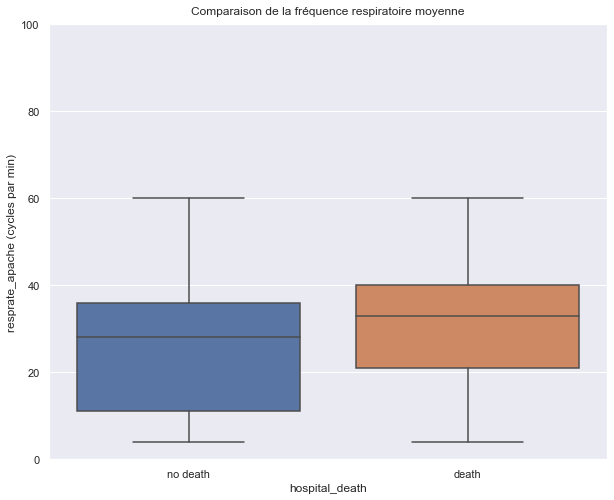

In [40]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparaison de la fréquence respiratoire moyenne", pad = 10)

resprate_apache= sns.boxplot(data = data, y = "resprate_apache", x = "hospital_death",whis=5);
resprate_apache.set_ylabel("resprate_apache (cycles par min)")

resprate_apache.set_xticklabels(["no death", "death"])
resprate_apache.set_ylim(0,100);



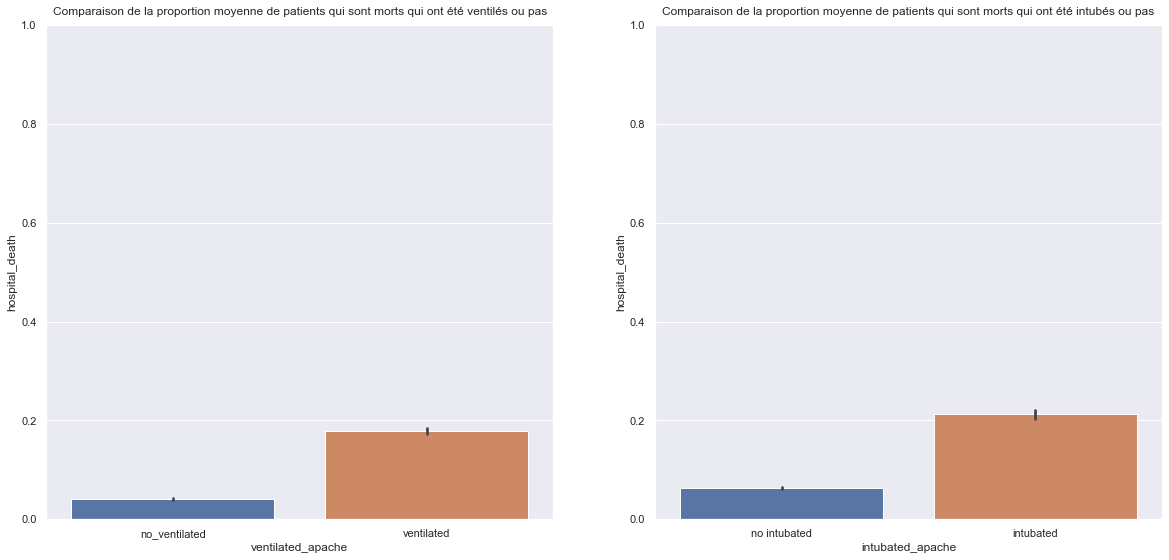

In [41]:
plt.figure(figsize = (20, 20)) 

plt.subplot(2,2,1)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont été ventilés ou pas", pad = 10)

ventilated_apache= sns.barplot(data = data, x = "ventilated_apache",  y = "hospital_death");

ventilated_apache.set_xticklabels(["no_ventilated", "ventilated"])
ventilated_apache.set_ylim(0,1);


plt.subplot(2,2,2)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont été intubés ou pas", pad = 10)

intubated_apache=sns.barplot(data = data, x = "intubated_apache",  y = "hospital_death");

intubated_apache.set_xticklabels(["no intubated", "intubated"])
intubated_apache.set_ylim(0,1);


Conclusion :  On observe dans sa globalité, que les patients qui décèdent ont une fréquence respiratoire un peu plus élevée et sont majoritairement ventilés et intubés par rapport aux patients qui survivent à la suite d'une hospitalisation.

### Etude température corporelle

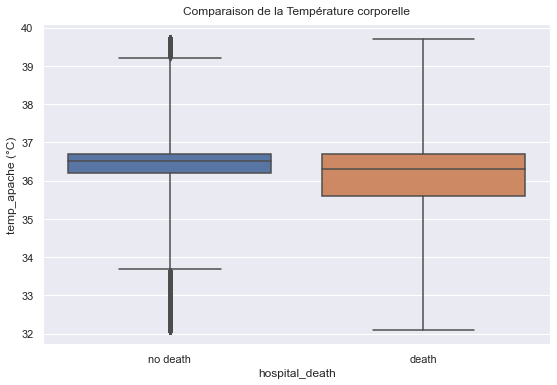

In [42]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparaison de la Température corporelle", pad = 10)

temp = sns.boxplot(data = data, y = "temp_apache", x = "hospital_death",whis=5)

temp.set_ylabel("temp_apache (°C)")

temp.set_xticklabels(["no death", "death"]);



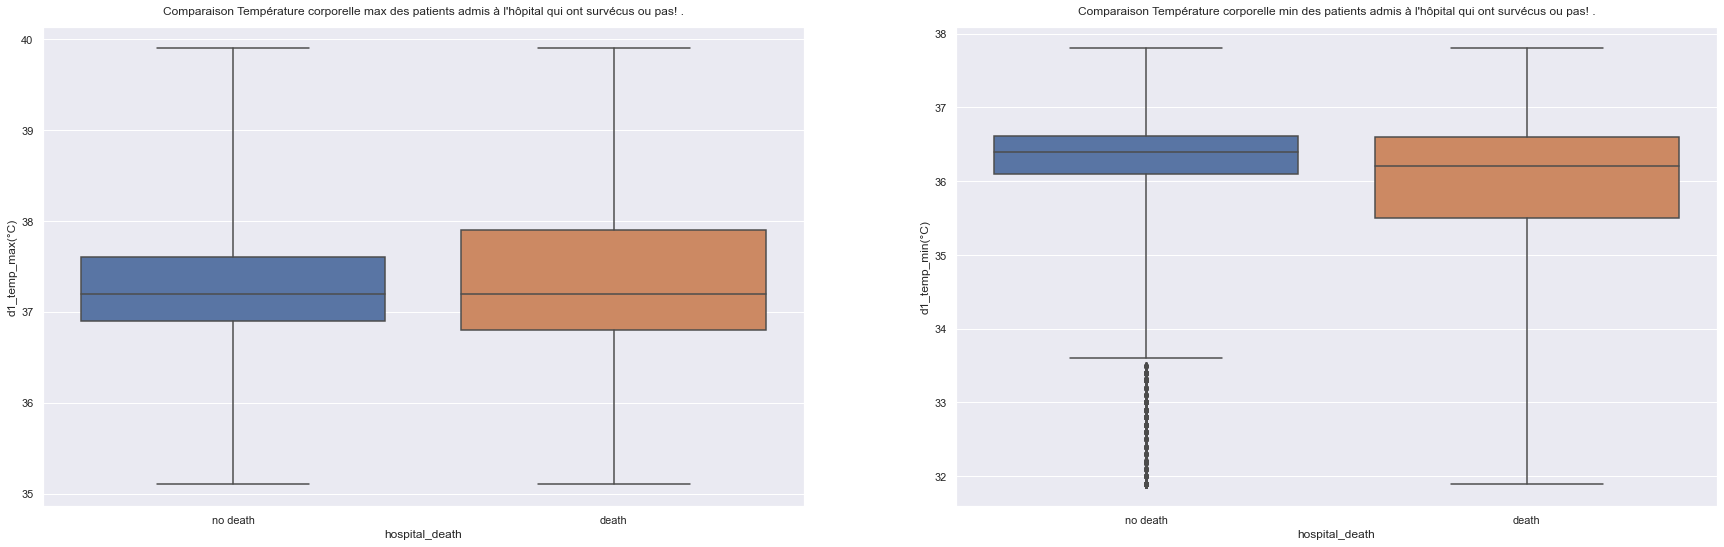

In [43]:
plt.figure(figsize = (30, 30)) 


plt.subplot(3,2,3)

plt.title("Comparaison Température corporelle max des patients admis à l'hôpital qui ont survécus ou pas! .", pad = 12)


temp_max = sns.boxplot(data = data, y = "d1_temp_max", x = "hospital_death",whis=5)
temp_max.set_ylabel("d1_temp_max(°C)")
temp_max.set_xticklabels(["no death", "death"]);


plt.subplot(3,2,4)

plt.title("Comparaison Température corporelle min des patients admis à l'hôpital qui ont survécus ou pas! .", pad = 12)


temp_min = sns.boxplot(data =data, y = "d1_temp_min", x = "hospital_death",whis=5);
temp_min.set_ylabel("d1_temp_min(°C)")
temp_min.set_xticklabels(["no death", "death"]);


Conclusion: On observe que chez les patients qui décèdent en mileu hospitalier une grande majorité  d'entre-eux ont des températures allant dans les extrêmes type fiève aux alentours de 38°C à 40 °C (T max) et d'hypothermie en dessous de 36 °C (T min) par rapport aux patients qui survivent à l'hospitalisation.

### Etude de la concentration des nutriments

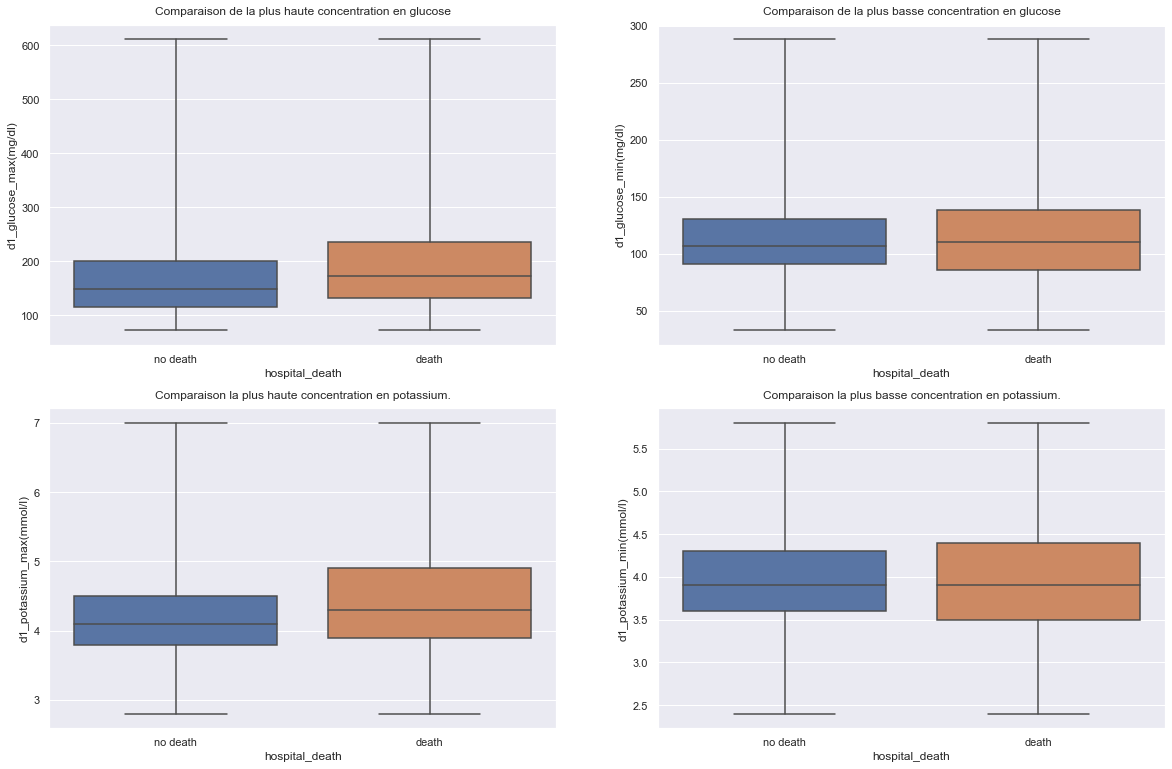

In [44]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparaison de la plus haute concentration en glucose", pad = 10)

glu_max = sns.boxplot(data = data, y = "d1_glucose_max", x = "hospital_death",whis=5)
glu_max.set_ylabel("d1_glucose_max(mg/dl)")
glu_max.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,2)

plt.title("Comparaison de la plus basse concentration en glucose", pad = 10)

glu_min = sns.boxplot(data = data, y = "d1_glucose_min", x = "hospital_death",whis=5)
glu_min.set_ylabel("d1_glucose_min(mg/dl)")
glu_min.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,3)

plt.title("Comparaison la plus haute concentration en potassium.", pad = 10)


pot_max = sns.boxplot(data = data, y = "d1_potassium_max", x = "hospital_death",whis=5)
pot_max.set_ylabel("d1_potassium_max(mmol/l)")
pot_max.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,4)

plt.title("Comparaison la plus basse concentration en potassium.", pad = 10)


pot_min = sns.boxplot(data = data, y = "d1_potassium_min", x = "hospital_death",whis=5);
pot_min.set_ylabel("d1_potassium_min(mmol/l)")
pot_min.set_xticklabels(["no death", "death"]);

Conclusion: Généralement chez les patients qu décèdent à l'hôpital,  une grande majorité d'entre-eux ont une concentration en glucose et en potassium un peu plus élevé par rapport à ceux qui survivent. 

### Etude sur les pathologies associées déjà existants chez le patient

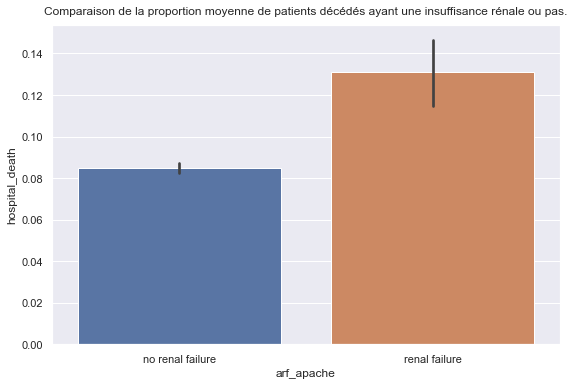

In [45]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparaison de la proportion moyenne de patients décédés ayant une insuffisance rénale ou pas.", pad = 10)

arf = sns.barplot(data = data, x = "arf_apache", y = "hospital_death");

arf.set_xticklabels(["no renal failure", "renal failure"]);


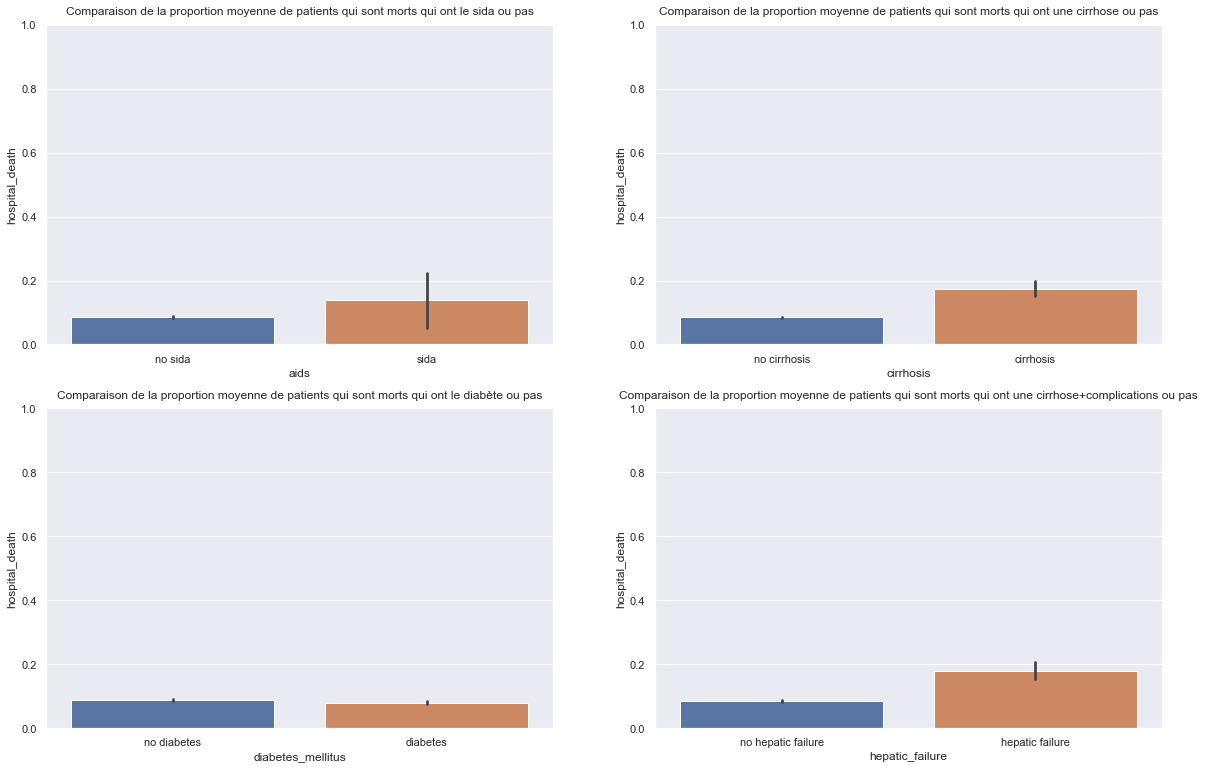

In [46]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont le sida ou pas", pad = 10)

aids= sns.barplot(data = data, x = "aids",  y = "hospital_death");
aids.set_ylim(0,1);
aids.set_xticklabels(["no sida", "sida"]);

plt.subplot(3,2,2)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont une cirrhose ou pas", pad = 10)

cir = sns.barplot(data = data, x = "cirrhosis",  y = "hospital_death");
cir.set_ylim(0,1);
cir.set_xticklabels(["no cirrhosis", "cirrhosis"]);

plt.subplot(3,2,3)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont le diabète ou pas", pad = 10)

dia = sns.barplot(data = data, x = "diabetes_mellitus",  y = "hospital_death");
dia.set_ylim(0,1);
dia.set_xticklabels(["no diabetes", "diabetes"]);

plt.subplot(3,2,4)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont une cirrhose+complications ou pas", pad = 10)

hepa= sns.barplot(data = data, x = "hepatic_failure",  y = "hospital_death");
hepa.set_ylim(0,1);
hepa.set_xticklabels(["no hepatic failure", "hepatic failure"]);

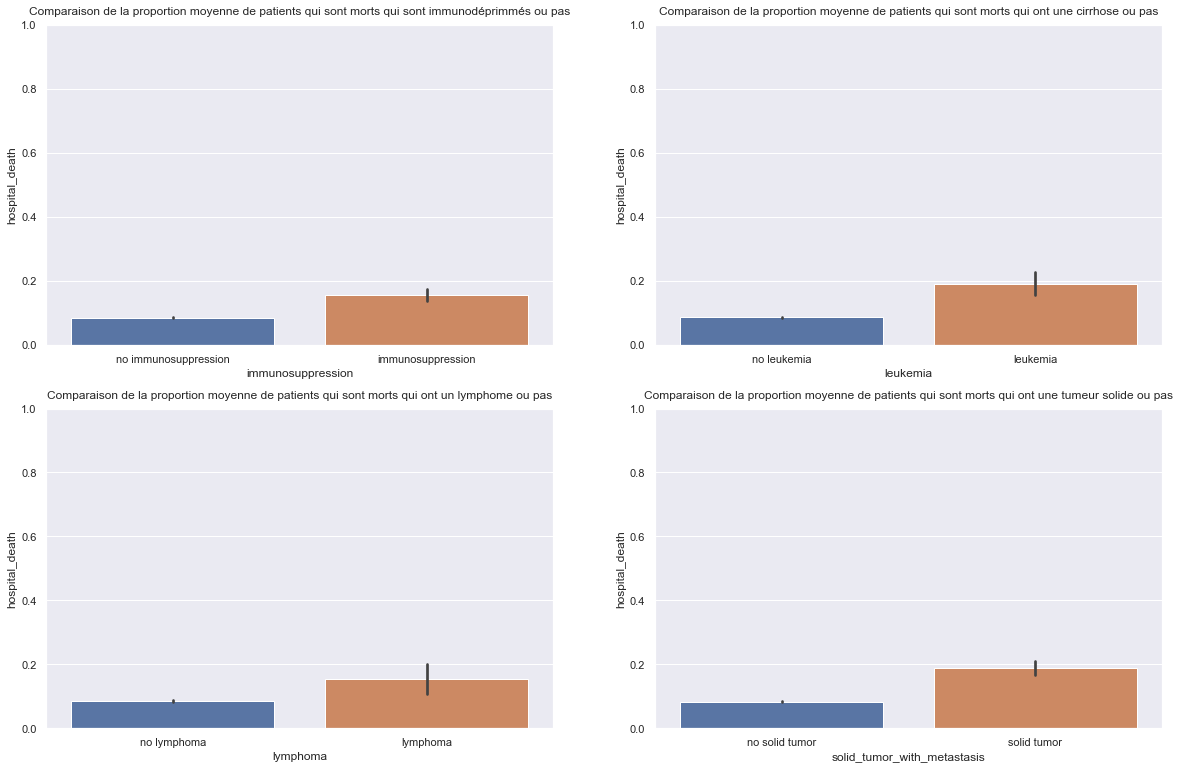

In [47]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui sont immunodéprimmés ou pas", pad = 10)

imm= sns.barplot(data = data, x = "immunosuppression",  y = "hospital_death");
imm.set_ylim(0,1);
imm.set_xticklabels(["no immunosuppression", "immunosuppression"]);

plt.subplot(3,2,2)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont une cirrhose ou pas", pad = 10)

leu=sns.barplot(data = data, x = "leukemia",  y = "hospital_death");
leu.set_ylim(0,1);
leu.set_xticklabels(["no leukemia", "leukemia"]);

plt.subplot(3,2,3)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont un lymphome ou pas", pad = 10)

lym=sns.barplot(data = data, x = "lymphoma",  y = "hospital_death");
lym.set_ylim(0,1);
lym.set_xticklabels(["no lymphoma", "lymphoma"]);

plt.subplot(3,2,4)

plt.title("Comparaison de la proportion moyenne de patients qui sont morts qui ont une tumeur solide ou pas", pad = 10)

stm = sns.barplot(data = data, x = "solid_tumor_with_metastasis",  y = "hospital_death");
stm.set_ylim(0,1);
stm.set_xticklabels(["no solid tumor", "solid tumor"]);

Conclusion : En général un patient qui a une ou plusieurs pathologies associées a plus de risque de décéder en milieu hospitalier par rapport à un patient qui n'en a pas.

### Etude des caractéristiques physiques du patient

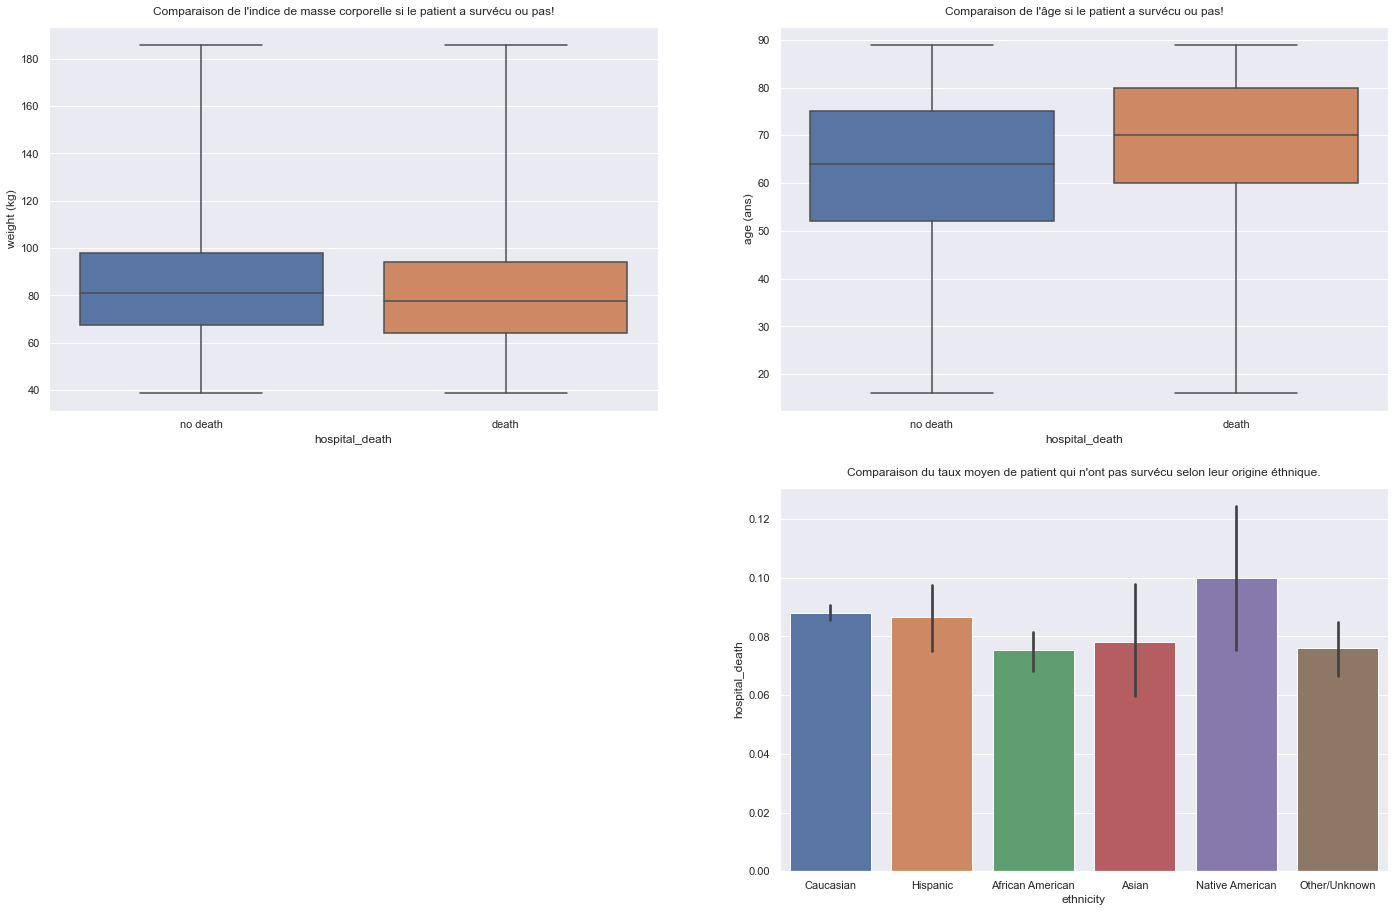

In [48]:
plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison de l'indice de masse corporelle si le patient a survécu ou pas!", pad = 12)

weight = sns.boxplot(data = data, y = "weight", x = "hospital_death",whis=5)
weight.set_ylabel("weight (kg)")
weight.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,2)

plt.title("Comparaison de l'âge si le patient a survécu ou pas!", pad = 12)

age=sns.boxplot(data = data, y = "age", x = "hospital_death",whis=5)
age.set_ylabel("age (ans)")
age.set_xticklabels(["no death", "death"]);




plt.subplot(3,2,4)

plt.title("Comparaison du taux moyen de patient qui n'ont pas survécu selon leur origine éthnique.", pad = 12)

ethnicity = sns.barplot(data = data, x= "ethnicity", y = "hospital_death");

Conclusion: On observe que les personnes plus âgées ont plus de risques de décéder à l'hôpital et que ce sont les origines des Américains natifs qui ont une proportion de décès hospitalier un peu plus élevée par rapport aux autres origines éthniques. Il semblerait que le poids n'a pas d'impact direct sur la mortalité hospitalière.

In [49]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio 
pio.renderers.default = "iframe_connected"

C:\Users\vanes\anaconda3\lib\site-packages\pyproj\__init__.py:76: UserWarning:

pyproj unable to set database path.

C:\Users\vanes\anaconda3\lib\site-packages\geopandas\_compat.py:106: UserWarning:

The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.



In [50]:
column_1 = ['age','gender','hospital_death']
fig = px.histogram(data[column_1],x='age',y='hospital_death',color='gender',
                    marginal='box',
                    hover_data=data[column_1].columns, title="Etude de l'influence de l'âge et du genre sur la survie en milieu hospitalier!",
                   labels=dict(age="age (years)"))

fig.update_layout(
    font_family="Times New Roman",
    font_color="blue",
    title_font_family="Rockwell",
    title_font_color="purple",
    legend_title_font_color="grey",
    
)

fig.show()

Conclusion: On observe quelque soit le genre la mortalité hospitalière augmente avec l'âge mais la mortalité chez la femme semble plus importante par rapport aux hommes à l'hôpital.

### Etude du type de soins et de l'unité

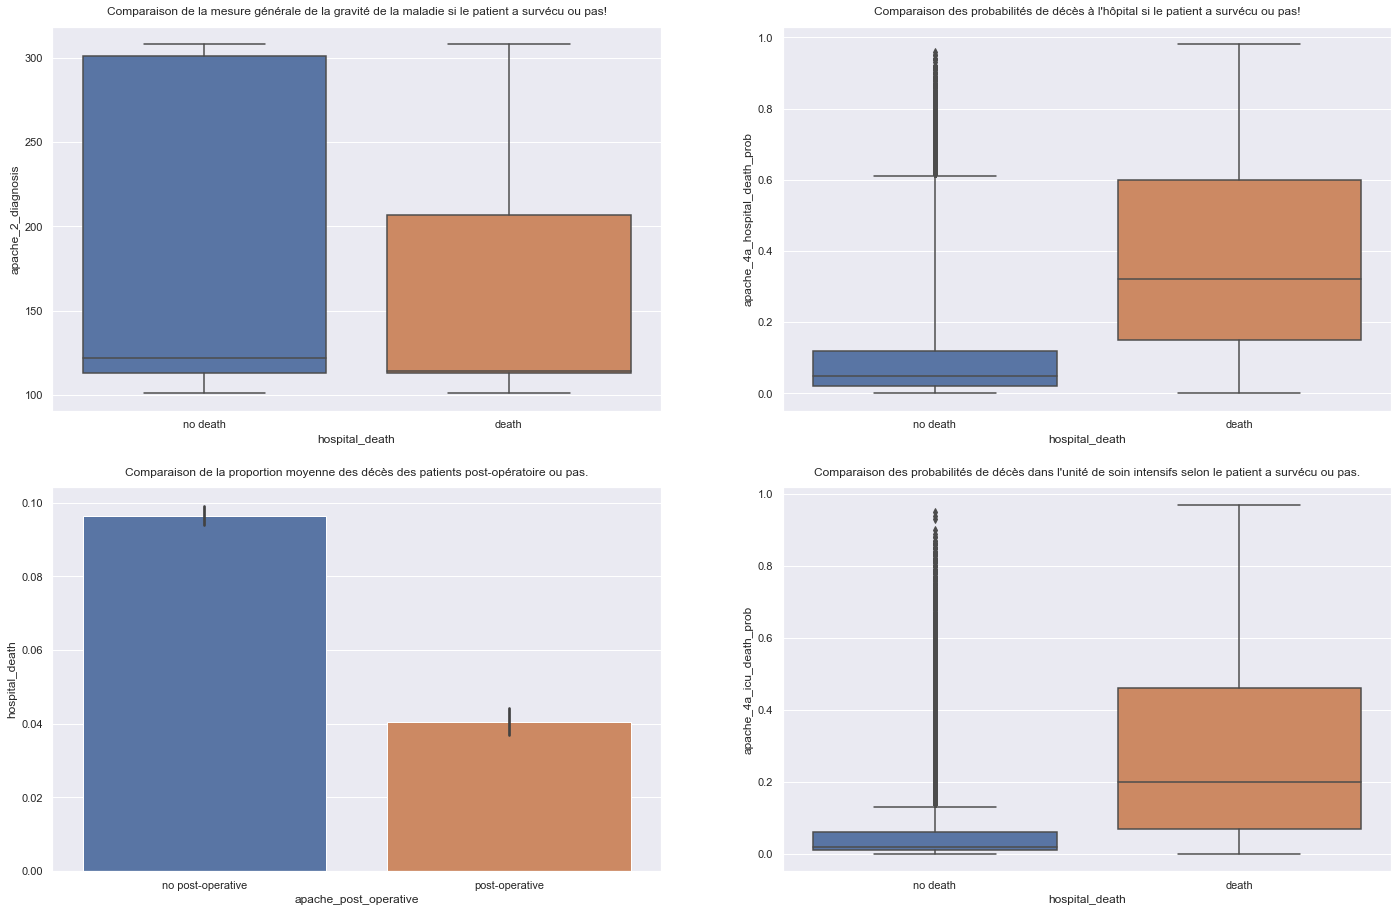

In [51]:
plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison de la mesure générale de la gravité de la maladie si le patient a survécu ou pas!", pad = 12)

apache_d =sns.boxplot(data = data, y = "apache_2_diagnosis", x = "hospital_death",whis=5)
apache_d.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,2)

plt.title("Comparaison des probabilités de décès à l'hôpital si le patient a survécu ou pas!", pad = 12)

apache_hospi = sns.boxplot(data = data, y = "apache_4a_hospital_death_prob", x = "hospital_death",whis=5)
apache_hospi.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,3)

plt.title("Comparaison de la proportion moyenne des décès des patients post-opératoire ou pas.", pad = 12)

post_op = sns.barplot(data = data, x= "apache_post_operative", y= "hospital_death")
post_op.set_xticklabels(["no post-operative", "post-operative"]);


plt.subplot(3,2,4)

plt.title("Comparaison des probabilités de décès dans l'unité de soin intensifs selon le patient a survécu ou pas.", pad = 12)

apache_icu = sns.boxplot(data = data, y= "apache_4a_icu_death_prob", x = "hospital_death");
apache_icu.set_xticklabels(["no death", "death"]);

Conclusion: La probabilité de décès calculée par la méthode apache corrèle très fortement avec la réalité quelque soit en milieu hospitalier et en unité se soin intensif. Et les patients post-opératoires survivent majoritairement pour la plupart d'entre eux. Par contre,la mesure générale de la gravité de la maladie est nettement plus élevée chez la majorité des patients qui ont survécus par rapport à ceux qui sont décédés. Ainsi cela montre que peut être les patients qui ont décédés en milieu hospitalier ont eu une sous évaluation de la gravité de la maladie qui est à l'origine d'une prise en charge non adaptée causant leur décès.

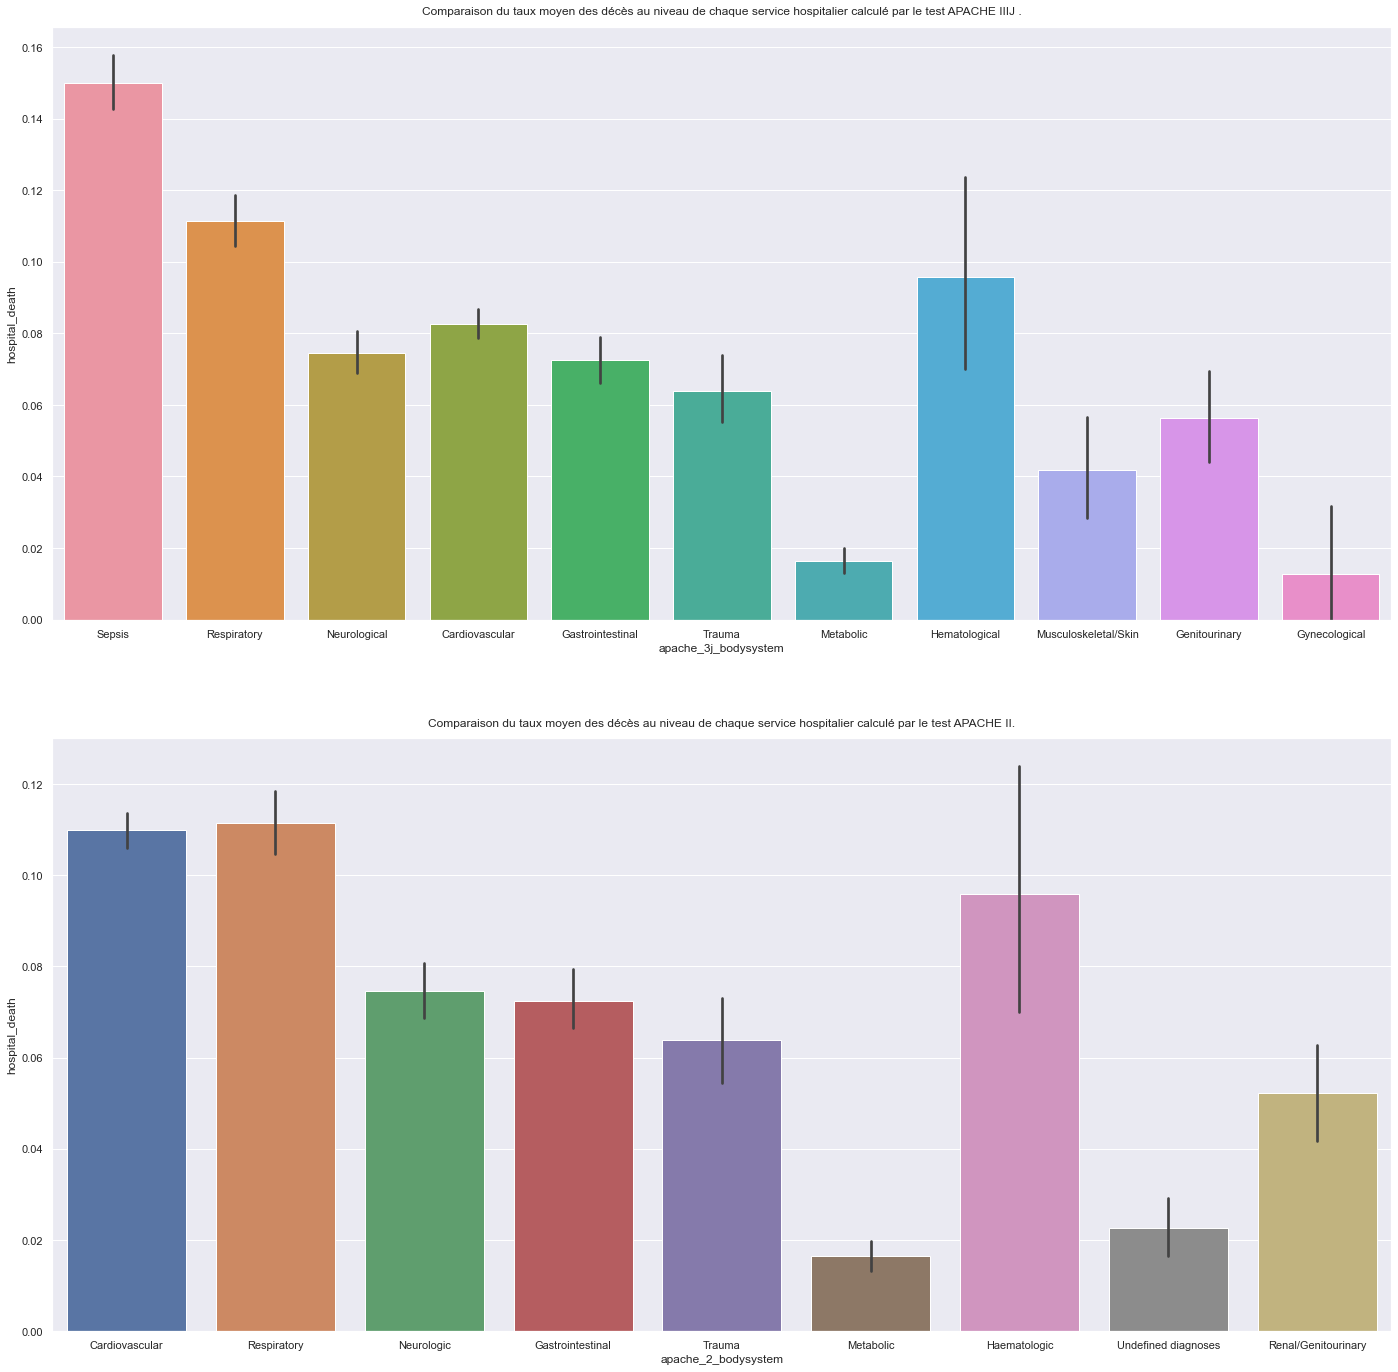

In [52]:
plt.figure(figsize = (24, 24))

plt.subplot(2,1,1)

plt.title("Comparaison du taux moyen des décès au niveau de chaque service hospitalier calculé par le test APACHE IIIJ .", pad = 12)

sns.barplot(data = data, x= "apache_3j_bodysystem", y= "hospital_death");

plt.subplot(2,1,2)

plt.title("Comparaison du taux moyen des décès au niveau de chaque service hospitalier calculé par le test APACHE II.", pad = 12)

sns.barplot(data = data, x= "apache_2_bodysystem", y= "hospital_death");

Conclusion: Selon la méthode apache IIIJ , les services sepsis et maladies respiratoires présentent les plus fortes proportions de décès . Alors que la méthode apache II, les services maladies cardio-vasculaires et respiratoires présentent les plus fortes proportion moyennes de décès à l'hôpital.

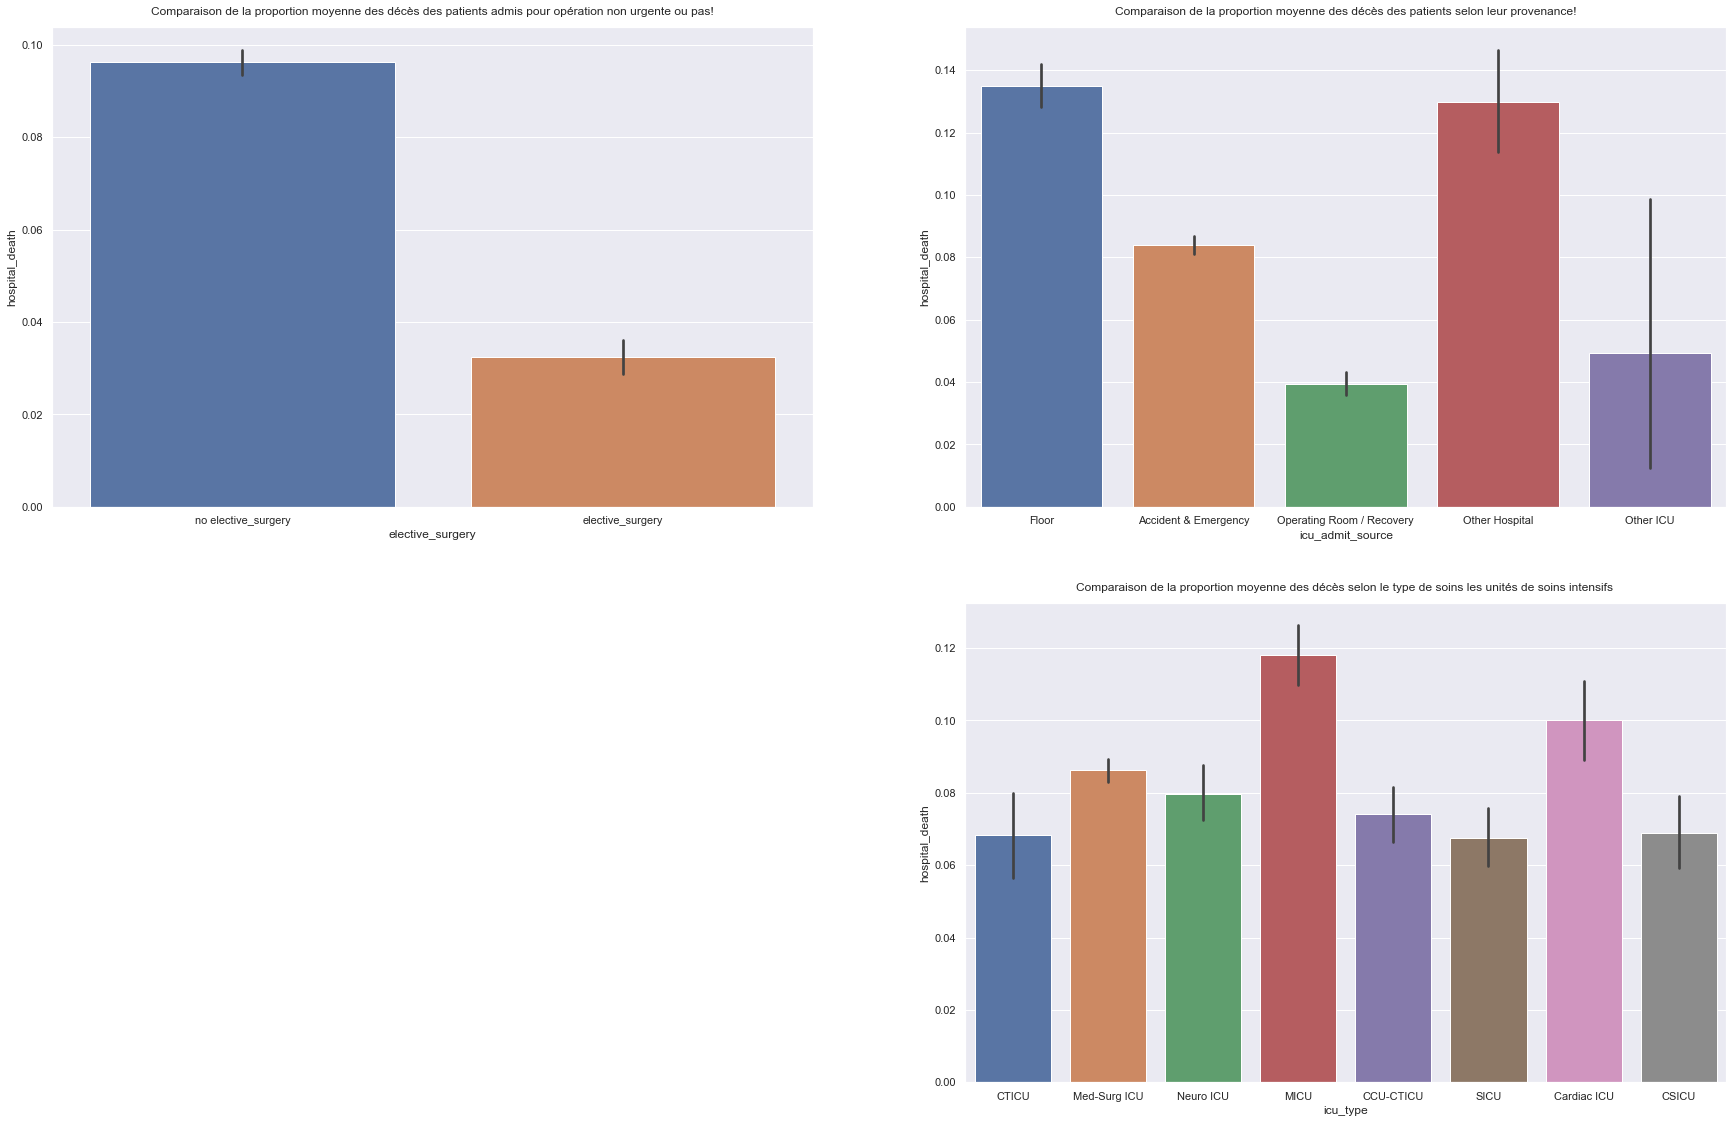

In [53]:
plt.figure(figsize = (30, 30))

plt.subplot(3,2,1)

plt.title("Comparaison de la proportion moyenne des décès des patients admis pour opération non urgente ou pas!", pad = 12)

es = sns.barplot(data = data, x = "elective_surgery", y = "hospital_death");
es.set_xticklabels(["no elective_surgery", "elective_surgery"]);


plt.subplot(3,2,2)

plt.title("Comparaison de la proportion moyenne des décès des patients selon leur provenance!", pad = 12)

sns.barplot(data = data, x = "icu_admit_source", y = "hospital_death");


plt.subplot(3,2,4)

plt.title("Comparaison de la proportion moyenne des décès selon le type de soins les unités de soins intensifs ", pad = 12)

sns.barplot(data = data, x = "icu_type", y = "hospital_death");

Conclusion: on observe une proportion moyenne de décès plus faible chez les patients qui sont admis pour une chirurgie non urgente. Et l'unité de soins intensifs médicaux (MICU) a une plus forte proportion de décès suivi de l'unité cardiaque parmi tous les soins intensifs prodigués.

# 3- Modelisation 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from matplotlib.pyplot import figure
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [55]:
data.shape

(56276, 58)

In [56]:
## Création des datasets target et features

target_name = 'hospital_death'

y = data.loc[:,target_name]
X = data.loc[:,[c for c in data.columns if c!=target_name]] 



In [57]:
X

,age,elective_surgery,ethnicity,gender,icu_admit_source,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_post_operative,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,0,Caucasian,M,Floor,CTICU,0.541667,73.9,113.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,77.0,0,Caucasian,F,Floor,Med-Surg ICU,0.927778,70.2,108.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,67.0,0,Caucasian,M,Accident & Emergency,Med-Surg ICU,0.000694,100.0,301.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
10,72.0,1,Hispanic,F,Operating Room / Recovery,Med-Surg ICU,0.004861,67.8,303.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
17,46.0,0,Hispanic,M,Accident & Emergency,CTICU,0.000000,72.6,108.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,47.0,1,Caucasian,M,Operating Room / Recovery,Med-Surg ICU,0.033333,186.0,304.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
91706,54.0,0,Native American,M,Accident & Emergency,Med-Surg ICU,0.025694,62.5,109.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
91708,75.0,0,Caucasian,M,Floor,Cardiac ICU,0.298611,72.9,113.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,56.0,0,Caucasian,F,Floor,Med-Surg ICU,0.120139,158.0,113.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


In [58]:
y

0        0
1        0
5        0
10       0
17       0
        ..
91698    0
91706    0
91708    0
91709    0
91712    0
Name: hospital_death, Length: 56276, dtype: int64

In [59]:
# Détermination des indices de positions des variables

idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'elective_surgery', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']  at positions

In [60]:
# Standardisation
numeric_transformer = StandardScaler()
categorie_transformer =OneHotEncoder()
# OHE / dummyfication
featureencoder = ColumnTransformer(
    transformers=[   
        ('cat', categorie_transformer, categorical_indices),
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X1 = featureencoder.fit_transform(X)

In [61]:
print(X1)

[[ 0.          0.          1.         ... -0.08927756 -0.06530727
  -0.15065838]
 [ 0.          0.          1.         ... -0.08927756 -0.06530727
  -0.15065838]
 [ 0.          0.          1.         ... -0.08927756 -0.06530727
  -0.15065838]
 ...
 [ 0.          0.          1.         ... -0.08927756 -0.06530727
   6.63753309]
 [ 0.          0.          1.         ... -0.08927756 -0.06530727
  -0.15065838]
 [ 0.          0.          1.         ... -0.08927756 -0.06530727
  -0.15065838]]


In [62]:
#Utilisation de SMOTE pour équilibrer les deux classes de la target

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X1, y)

In [63]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 51431, 1: 51431})


In [64]:
y = y_res
X1 = X_res

In [65]:
# Split du dataset

X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=0,stratify= y)


## Modèle de base : LogisticRegression

In [66]:
print("Training model...")
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [67]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [68]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))


f1-score on train set :  0.7891882521915705
f1-score on test set :  0.7848038239394542


f1-score on train set :  0.7891882521915705


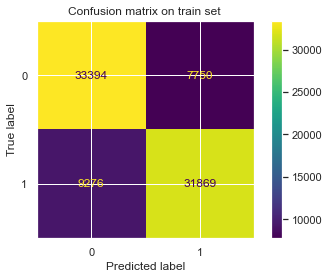

f1-score on test set :  0.7848038239394542


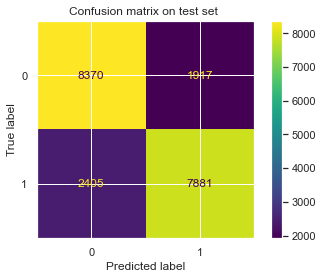

In [69]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred));

cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("f1-score on test set : ", f1_score(y_test, y_test_pred));

cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph


## Evaluation de la performence du modèle LogisticRegression par la cross-validation

### sur le train

In [70]:
print("5-fold cross-validation...")
scores_log_train = cross_val_score(classifier, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_log_train.mean())
print('The standard deviation is : ', scores_log_train.std())

5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\vanes\anaconda3\lib\site-packages

The cross-validated f1-score is :  0.7884501475951001
The standard deviation is :  0.0031511814087779194


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### sur le test

In [71]:
print("5-fold cross-validation...")
scores_log_test = cross_val_score(classifier, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_log_test.mean())
print('The standard deviation is : ', scores_log_test.std())

5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\vanes\anaconda3\lib\site-packages

The cross-validated f1-score is :  0.7856461966919
The standard deviation is :  0.00636656030386778


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### sur l'ensemble de la dataset

In [72]:
print("5-fold cross-validation...")
scores_log_dataset = cross_val_score(classifier, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_log_dataset.mean())
print('The standard deviation is : ', scores_log_dataset.std())

5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\vanes\anaconda3\lib\site-packages

The cross-validated f1-score is :  0.7770971682743504
The standard deviation is :  0.00592692343047259


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Conclusion sur le modèle de base

Conclusion : modèle robuste qui généralise bien confirmé par la cross-validation mais le score ne reste pas satisfaisant.

## Optimisation des hyperparamètres pour la LogisticRegression

In [94]:
param_grid = [    
    {'penalty' : ['elasticnet','l1', 'l2','none'],
    'C' : np.logspace(-4, 4, 20),
    }
]

model = LogisticRegression(random_state =0, solver = "saga")

In [95]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring = "f1")

In [83]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.70726847 0.77372533 0.7886036         nan 0.73593833
 0.78017113 0.7886036         nan 0.7635539  0.78424741 0.7886036
        nan 0.77484967 0.78614611 0.7886036         nan 0.78178097
 0.78739936 0.7886036         nan 0.78591833 0.78801542 0.7886036
        nan 0.78766258 0.78819666 0.7886036         nan 0.78820068
 0.78830165 0.7886036         nan 0.78832423 0.78849279 0.7886036
        nan 0.78840777 0.78855397 0.7886036         nan 0.78854825
 0.78859377 0.7886036         nan 0.78851882 0.78857882 0.7886036
        nan 0.78859374 0.78857882 0.7886036         nan 0.78857882
 0.78858865 0.7886036         nan 0.78857882 0.7886036  0.7886036
        nan 0.7886036  0.7886036  0.7886036         nan 0.7886036
 0.7886036  0.7886036         nan 0.7886036  0.7886036  0.7886036
        nan 0.7886036  0.7886036  0.7886036         nan 0.7

In [84]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none', random_state=0, solver='saga')

## Application du modèle LogisticRegression sur les paramètres optimisés 

In [73]:
classifier_opt = LogisticRegression(C=0.0001, penalty='none', random_state=0, solver='saga')
classifier_opt.fit(X_train,y_train)

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=0.0001, penalty='none', random_state=0, solver='saga')

In [74]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred_opt = classifier_opt.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred_opt = classifier_opt.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [75]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_opt))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_opt))

f1-score on train set :  0.7892651029153146
f1-score on test set :  0.7844406813427631


accuracy-score on train set :  0.7892651029153146


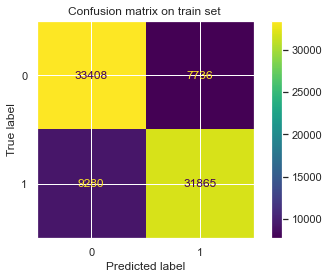

accuracy-score on test set :  0.7844406813427631


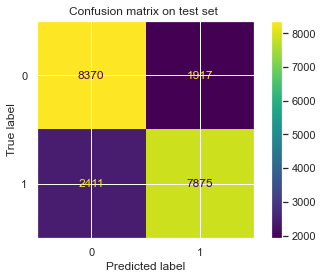

In [76]:
print("accuracy-score on train set : ", f1_score(y_train, y_train_pred_opt));

cm = plot_confusion_matrix(classifier_opt, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("accuracy-score on test set : ", f1_score(y_test, y_test_pred_opt));

cm = plot_confusion_matrix(classifier_opt, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph

## Evalution du modèle LogisticRegression optimisé par la cross-validation

### sur l'ensemble de la dataset

In [77]:
print("5-fold cross-validation...")
scores_log_opt_dataset = cross_val_score(classifier_opt, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_log_opt_dataset.mean())
print('The standard deviation is : ', scores_log_opt_dataset.std())

5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anacond

The cross-validated f1-score is :  0.7769657915721574
The standard deviation is :  0.0060604179961970235


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



### sur le train

In [78]:
print("5-fold cross-validation...")
scores_log_opt_train = cross_val_score(classifier_opt, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_log_opt_train.mean())
print('The standard deviation is : ', scores_log_opt_train.std())

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anacond

The cross-validated f1-score is :  0.7886036024804677
The standard deviation is :  0.003317112454474886


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



### sur le test

In [79]:
print("5-fold cross-validation...")
scores_log_opt_test = cross_val_score(classifier_opt, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_log_opt_test.mean())
print('The standard deviation is : ', scores_log_opt_test.std())

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\vanes\anacond

The cross-validated f1-score is :  0.785543473460929
The standard deviation is :  0.0066219761402384995


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



###  Conclusion sur le modèle LogisticRegression optimisé

Conclusion: Malgré les paramètres optimisés de la logistic regression, on obtient pas un meilleurs score f1

## Modèle non linéaire: Random forest 

In [80]:
print("Training model...")

classifier_random =RandomForestClassifier(n_estimators = 20, random_state = 0, max_depth = 9,min_samples_leaf=6)

classifier_random.fit(X_train, y_train)
print("...Done.")


Training model...
...Done.


In [81]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred_random = classifier_random.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred_random = classifier_random.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [82]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_random))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_random))

f1-score on train set :  0.9149500160471669
f1-score on test set :  0.9071486480041966


f1-score on train set :  0.9149500160471669


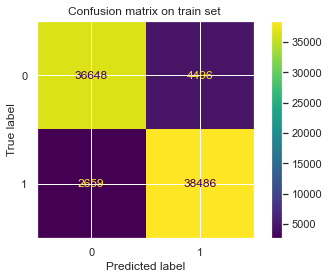

f1-score on test set :  0.9071486480041966


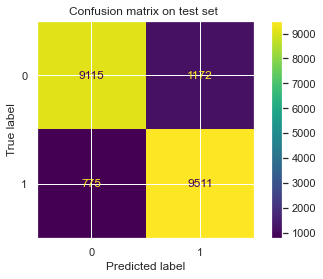

In [83]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_random));

cm = plot_confusion_matrix(classifier_random, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("f1-score on test set : ", f1_score(y_test, y_test_pred_random));

cm = plot_confusion_matrix(classifier_random, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph

## Evaluation du modèle Random forest  par la cross-validation

### sur le train

In [84]:
print("5-fold cross-validation...")
scores_random_train = cross_val_score(classifier_random, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_random_train.mean())
print('The standard deviation is : ', scores_random_train.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.898970392717103
The standard deviation is :  0.002358101881986411


### sur le test

In [85]:
scores_random_test = cross_val_score(classifier_random, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_random_test.mean())
print('The standard deviation is : ', scores_random_test.std())

The cross-validated f1-score is :  0.8910258778785677
The standard deviation is :  0.002234625463118122


### sur l'ensemble de la dataset

In [86]:
print("5-fold cross-validation...")
scores_random_dataset = cross_val_score(classifier_random, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_random_dataset.mean())
print('The standard deviation is : ', scores_random_dataset.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8931199102331915
The standard deviation is :  0.031400140162950445


#### Conclusion sur le modèle Random forest 

Conclusion : Le random Forest donne f1 score plus élevée par rapport à la logistic regression qui 0.91 environ sans over-fitting ou under-fitting dont la bonne performence de prédiction est confirmée par la cross-validation avec 0.89 environ (bien qu'il est une légère chute du f1-score), aussi bien pour le train/test et l'ensemble de la dataset dont les scores sont très proches ou pratiquement équivalents.

## XGBoost

In [87]:
xgb=XGBClassifier(learning_rate=0.0015, max_depth=9, n_estimators = 71)

In [88]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0015, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=71, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [89]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred_xgb = xgb.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred_xgb= xgb.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [90]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_xgb))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_xgb))

f1-score on train set :  0.917661700304087
f1-score on test set :  0.910091743119266


f1-score on train set :  0.917661700304087


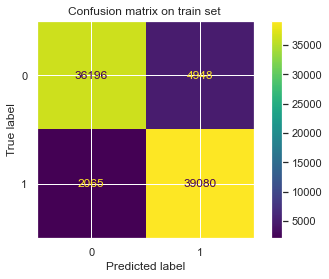

f1-score on test set :  0.910091743119266


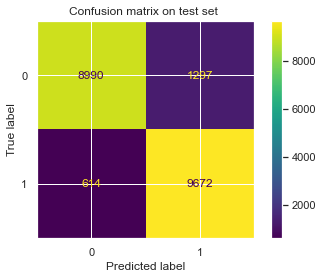

In [91]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_xgb));

cm = plot_confusion_matrix(xgb, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("f1-score on test set : ", f1_score(y_test, y_test_pred_xgb));

cm = plot_confusion_matrix(xgb, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph

##  Evaluation du modèle XGBoost par la cross-validation

### sur le train

In [92]:
print("5-fold cross-validation...")
scores_xgb_train = cross_val_score(xgb, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores_xgb_train.mean())
print('The standard deviation is : ', scores_xgb_train.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.9118154903037077
The standard deviation is :  0.0012751709123845194


### sur l'ensemble de la dataset

In [93]:
print("5-fold cross-validation...")
scores_xgb_dataset = cross_val_score(xgb, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ',scores_xgb_dataset.mean())
print('The standard deviation is : ', scores_xgb_dataset.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8918497254165769
The standard deviation is :  0.04380188905433607


### sur le test

In [94]:
print("5-fold cross-validation...")
scores_xgb_test = cross_val_score(xgb, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ',scores_xgb_test.mean())
print('The standard deviation is : ', scores_xgb_test.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8926846851184804
The standard deviation is :  0.007463284363836355


#### Conclusion XGBoost

Conclusion : Le XG boost donne un f1-score est équivalent au random-forest et plus élevé au logistic regression avec f1-score = 0.91 environ. Mais lors de l'évaluation de la performence du modèle il y a une légère chute du f1 score sur le test et l'ensemble de la dataset avec le f1-score = 0.89 tandis que la cross validation sur le train est resté à 0.91. Ainsi cela montre un overfitting  du modèle.

#### Tableau récapitulatif

In [96]:
#Tableau récap

ind=['Logistic regression (modèle de base)','Logistic regression(optimisée)','Randomforest','XGBoost']
data={'f1 score train':[round(f1_score(y_train, y_train_pred),3),round(f1_score(y_train, y_train_pred_opt),3),round(f1_score(y_train, y_train_pred_random),3),
                        round(f1_score(y_train, y_train_pred_xgb),3)],
      "f1 score test":[round(f1_score(y_test, y_test_pred),3),round(f1_score(y_test, y_test_pred_opt),3),round(f1_score(y_test, y_test_pred_random),3) ,round(f1_score(y_test, y_test_pred_xgb),3)],
     "cross validation train": [round(scores_log_train.mean(),3),round(scores_log_opt_train.mean(),3),round(scores_random_train.mean(),3),round(scores_xgb_train.mean(),3)],
     "cross validation test":[round(scores_log_test.mean(),3),round(scores_log_opt_test.mean(),3), round(scores_random_test.mean(),3),round(scores_xgb_test.mean(),3)],
     "cross validation dataset":[round(scores_log_dataset.mean(),3),round(scores_log_opt_dataset.mean(),3),round(scores_random_dataset.mean(),3),round(scores_xgb_dataset.mean(),3)]}
result=pd.DataFrame(data=data,index=ind)
result

,f1 score train,f1 score test,cross validation train,cross validation test,cross validation dataset
Logistic regression (modèle de base),0.789,0.785,0.788,0.786,0.777
Logistic regression(optimisée),0.789,0.784,0.789,0.786,0.777
Randomforest,0.915,0.907,0.899,0.891,0.893
XGBoost,0.918,0.910,0.912,0.893,0.892


#### Conclusion finale

Donc au niveau du choix du modèle, pour la prediction je le porterai sur le random forest qui présente un bon f1-score = 0.91 environ et dont l'évalution de la performence du modèle reste correct avec f1-score très proche sur le train/test et l'ensemble de la dataset mise en évidence par la cross-valiation.

Donc je choisirais le random forest comme modèle de prédiction pour le développement de l'application web.